# Wage prediction

------------------
# Linear Regression

## 모듈

In [1]:
import os
import sys
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
from time import sleep

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#그래프 폰트 전역 설정
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'calibri'
mpl.rcParams['font.size'] = 15
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize']   = 20
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams["legend.frameon"] = True
mpl.rcParams["legend.facecolor"] = 'white'

In [2]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from scipy import stats
from scipy import nanmean
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 데이터 불러오기

In [4]:
# 디렉토리 내 파일 확인
os.listdir()

['.git',
 '.ipynb_checkpoints',
 '0. 문제 정의.ipynb',
 '1. EDA.ipynb',
 '2. Preprocessing.ipynb',
 '3. Linear Regression.ipynb',
 'Cross Validation.ipynb',
 'EDA - 복사본.ipynb',
 'fifa19.csv',
 'fifa_wage_prediction.xlsx',
 'Kmeans 연습.ipynb',
 'LICENSE',
 'Linear Regression.ipynb',
 'Log transformation.ipynb',
 'PCA 실전.ipynb',
 'PCA 연습.ipynb',
 'players_20.csv',
 'README.md',
 'SVM.ipynb',
 'test_prep.csv',
 'train_prep.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 '나만의 EDA_FIFA.ipynb',
 '코사인 유사도 연습.ipynb',
 '피파 머신러닝 연습(EDA).ipynb',
 '피파 머신러닝 흐름잡기.ipynb',
 '피파 머신러닝.zip']

In [5]:
fifa = pd.read_excel('fifa_wage_prediction.xlsx')
X_train = pd.read_csv('train_prep.csv')

[ Wage ~ovr ]

차수를 늘려가면서

돌린 모델의 결과를

데이터프레임에 저장하고

train / test error 그래프 그리기

- kfold 이용
- cv 내가 원하는 옵션(repeated)
--> train set에서 비교 가능

In [6]:
fifa.Wage

0       285
1       250
2       160
3       175
4       110
       ... 
2773      1
2774      1
2775      1
2776      1
2777      1
Name: Wage, Length: 2778, dtype: int64

In [7]:
fifa.Overall.to_numpy().reshape(-1,1)

array([[88],
       [87],
       [86],
       ...,
       [47],
       [47],
       [47]], dtype=int64)

Text(0, 0.5, 'Wage')

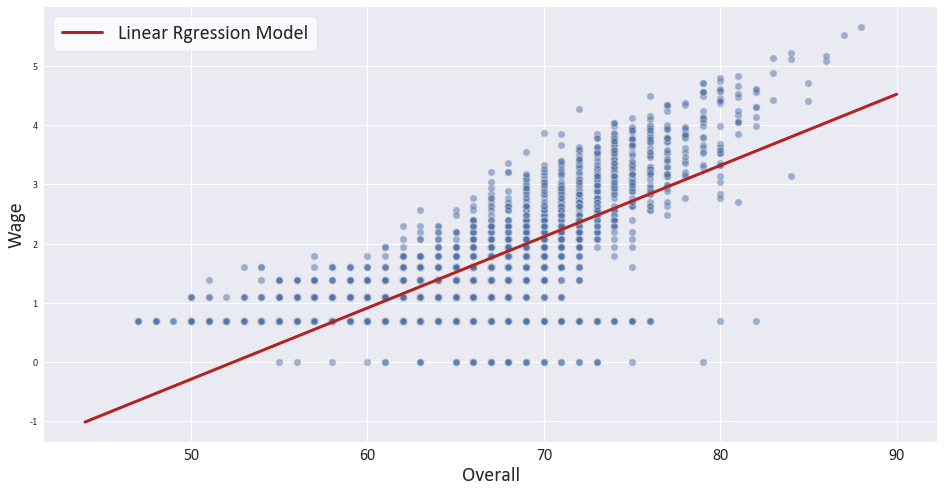

In [6]:
X = fifa.Overall.to_numpy().reshape(-1,1)
y = np.log1p(fifa.Wage)
#y = fifa.Wage

model = LinearRegression()
model.fit(X,y)

plt.figure(figsize=(16,8))
plt.scatter(X,y, alpha=0.5, s=50, edgecolor='lightgrey', linewidth=1)

line = np.linspace(44,90,500).reshape(-1,1)
plt.plot(line, model.predict(line), color = 'firebrick', label = 'Linear Rgression Model')
plt.legend(fontsize=20)
plt.xlabel("Overall")
plt.ylabel("Wage")

Text(0, 0.5, 'Wage')

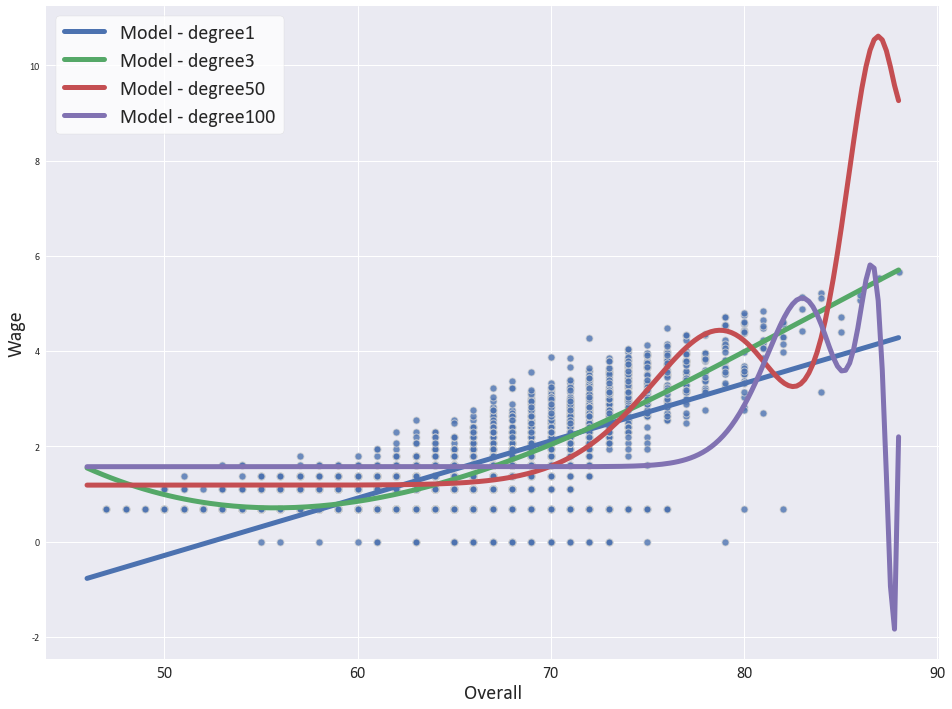

In [7]:
#https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/

X = fifa.Overall.to_numpy().reshape(-1,1)
y = np.log1p(fifa.Wage)
#y = fifa.Wage

plt.figure(figsize=(16,12))
plt.scatter(X,y, alpha=0.8, s=50, edgecolor='lightgrey', linewidth=1)


degree = [1,3,50,100]
for i in degree:
    poly = PolynomialFeatures(degree = i, include_bias=False)
    X_pol = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_pol,y)

    line = np.linspace(46,88,200)[:, np.newaxis]
    plt.plot(line, model.predict(poly.fit_transform(line)), label ='Model - degree'+str(i),
             linewidth=5, alpha=1)

    
    
plt.legend(fontsize=20)
plt.xlabel("Overall")
plt.ylabel("Wage")

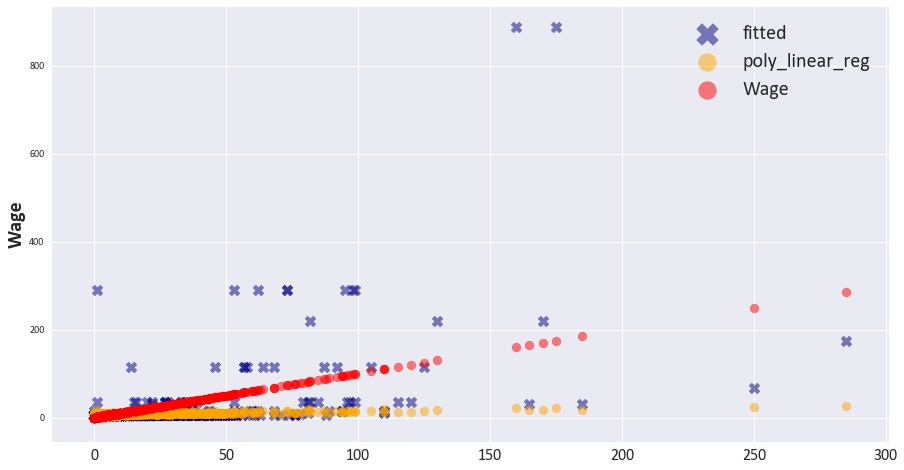

In [117]:
# 오버피팅 여부 확인하기 (피팅시)

model = linear_reg

X = fifa.Overall.to_numpy().reshape(-1,1)
y = np.log1p(fifa.Wage)
y = fifa.Wage

poly = PolynomialFeatures(100)
X_pol = poly.fit_transform(X)


# 어떻게 fitting 되었는지
model.fit(X_pol,y)
model.predict(X_pol)
fitted = pd.DataFrame(model.predict(X_pol))

# out of fold 와 비교 (cross-val predict)
oof_poly_linear_reg = pd.DataFrame(cross_val_predict(model, X, y, cv=5))
prediction = pd.concat([y.reset_index().Wage, fitted, oof_poly_linear_reg],axis=1)
prediction.columns = ['Wage', 'fitted','poly_linear_reg']
prediction

##### 그림그리기
data = prediction
s, alpha, markerscale = 80, 0.5 ,2

plt.figure(figsize=(15,8))
plt.scatter(x='Wage', y='fitted', data = data, s=120, alpha=alpha, color='navy', marker='X')
plt.scatter(x='Wage', y='poly_linear_reg', data = data, s=s, alpha=alpha, color='orange')
plt.scatter(x='Wage', y='Wage', data = data, s=s, color='red', alpha=0.5)
plt.ylabel('Wage', weight='bold')

#plt.ylim(0,300)
plt.legend(fontsize=20,markerscale=markerscale)

In [11]:
# cross validation setting - 원하는 옵션 선택

random = np.random.randint(1,1000,1)[0]
kfold            = KFold(n_splits=10, shuffle=True, random_state=1)
repeated_kfold   = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
stratified_kfold = StratifiedKFold(n_splits=2, random_state=1)

In [12]:
X = fifa.Overall.to_numpy().reshape(-1,1)
y = np.log1p(fifa.Wage)

model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
X = fifa.Overall.to_numpy().reshape(-1,1)
y = fifa.Wage

degree = range(1,46)
train_mse = []
test_mse  = []

for i in degree:
    poly = PolynomialFeatures(degree = i, include_bias=False)
    X_pol = poly.fit_transform(X)
    
    
    val_score = cross_validate(model, X_pol, y, cv = repeated_kfold,
                                      scoring = ('neg_mean_squared_error','r2') ,
                                      return_train_score = True)
    score = val_score
    train_mse.append(-score['train_neg_mean_squared_error'].mean())
    test_mse.append( -score['test_neg_mean_squared_error'].mean())

    
dict = {'degree' : degree,
       'train_mse' : train_mse,
       'test_mse' : test_mse}
    
df = pd.DataFrame(dict)
df.head()

,degree,train_mse,test_mse
0,1,189.216683,190.631782
1,2,107.875534,110.581103
2,3,81.807032,85.443392
3,4,77.010088,81.064071
4,5,75.254445,79.305082


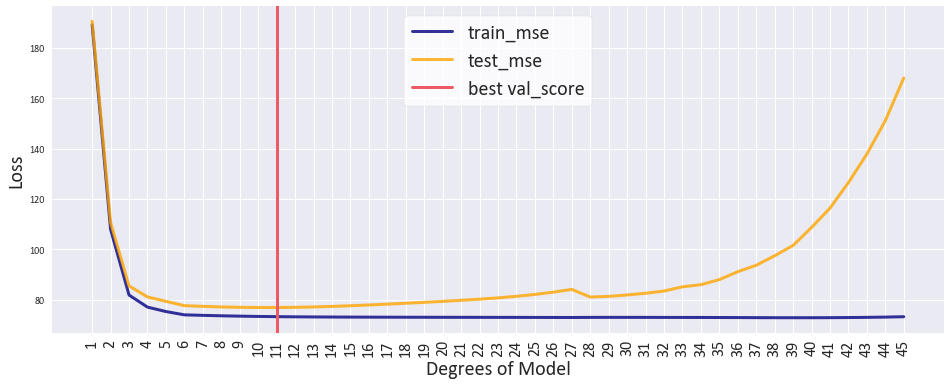

In [14]:
best = df[df.test_mse == min(df.test_mse)].degree
best

plt.figure(figsize=(16,6))
plt.plot(df.train_mse, label = 'train_mse', color='navy',   alpha=0.8)
plt.plot(df.test_mse,  label = 'test_mse',  color='orange', alpha=0.8)
plt.xticks(np.arange(len(df)),  labels = df.degree, rotation=90)
plt.axvline(x = int(best), color='#ED5A66', alpha=1, label='best val_score')
plt.xlabel('Degrees of Model')
plt.ylabel('Loss')
plt.legend(fontsize=20)
plt.show()

이제 진짜 전처리 해놓은 데이터로 실습을 해보자

## Linear Regression

In [15]:
df = pd.read_csv('train_prep.csv')
df.head()

,Wage,Age,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,def_hi,def_low,def_mid,off_hi,off_low,off_mid,body_lean,body_normal,body_stocky,num2cat
0,17,1.890241,1.897314,0.504524,0.596244,0.924429,0.824673,0.510466,1.609366,0.829636,...,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
1,8,0.557477,-0.136560,0.842159,-0.025075,-0.913213,0.217403,-1.464705,0.567594,-0.905227,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
2,5,-1.041841,-0.645029,-0.846018,0.285585,1.175017,-0.632776,0.151344,0.247049,0.395921,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
3,7,-0.775288,1.388846,-0.677200,-0.025075,-1.581446,0.824673,-0.028217,-0.233769,-0.905227,...,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
4,9,-1.041841,-0.136560,0.673341,-0.025075,-1.080271,-0.389868,-0.926022,-1.676223,-0.182367,...,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0


In [16]:
X_train = df.iloc[:,1:]
X_train.head()

,Age,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,def_hi,def_low,def_mid,off_hi,off_low,off_mid,body_lean,body_normal,body_stocky,num2cat
0,1.890241,1.897314,0.504524,0.596244,0.924429,0.824673,0.510466,1.609366,0.829636,1.042222,...,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
1,0.557477,-0.136560,0.842159,-0.025075,-0.913213,0.217403,-1.464705,0.567594,-0.905227,-2.095652,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
2,-1.041841,-0.645029,-0.846018,0.285585,1.175017,-0.632776,0.151344,0.247049,0.395921,-0.762055,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
3,-0.775288,1.388846,-0.677200,-0.025075,-1.581446,0.824673,-0.028217,-0.233769,-0.905227,0.257754,...,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
4,-1.041841,-0.136560,0.673341,-0.025075,-1.080271,-0.389868,-0.926022,-1.676223,-0.182367,0.885329,...,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0


In [16]:
y = df.Wage
y.head()

0    17
1     8
2     5
3     7
4     9
Name: Wage, dtype: int64

# Model Fitting

- 로그변환한 상태로 피팅을 시키고, 다시 이를 올바른 예측값으로 변환해주어야 함.
- ***scikit learn***의 `TransformedTargetRegressor` 사용.

In [17]:
# cross validation setting - 원하는 옵션 선택

random = np.random.randint(1,1000,1)[0]
kfold            = KFold(n_splits=10, shuffle=True, random_state=1)
repeated_kfold   = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
stratified_kfold = StratifiedKFold(n_splits=2, random_state=1)

In [18]:
# model
linear_reg = LinearRegression()
linear_reg = TransformedTargetRegressor(regressor=linear_reg,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function
ridge = Ridge(alpha=100000)
ridge = TransformedTargetRegressor(regressor=ridge,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function
lasso = Lasso(alpha=0.01)
lasso = TransformedTargetRegressor(regressor=lasso,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function

elastic = ElasticNet(alpha=0.01, l1_ratio=1e-05)
elastic = TransformedTargetRegressor(regressor=elastic,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function

### Linear Regression

In [20]:
#linear regression 
model = linear_reg
X = X_train 
y = df.Wage

linear_reg_val_score = cross_validate(model, X, y, cv = repeated_kfold,
                                      scoring = ('neg_mean_squared_error','r2') ,
                                      return_train_score = True)

score = linear_reg_val_score
print('Train R2  : {}'.format(score['train_r2'].mean()))
print('Test  R2  : {}'.format(score['test_r2'].mean()))
print('Train MSE : {}'.format(-score['train_neg_mean_squared_error'].mean()))
print('Test  MSE : {}'.format(-score['test_neg_mean_squared_error'].mean()))

Train R2  : 0.6665630206529246
Test  R2  : 0.594842991684741
Train MSE : 216.10478548462157
Test  MSE : 237.4946882332868


In [21]:
linear_reg = LinearRegression()
linear_reg = TransformedTargetRegressor(regressor=linear_reg,
                                            func=np.log1p,        
                                            inverse_func=np.exp) 
model = linear_reg

X = X_train
y = df.Wage

model.fit(X,y)

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log1p'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           transformer=None)

In [22]:
model.regressor_.coef_

array([-3.85558690e-03,  4.62693937e-02, -1.03595563e-02, -2.38077744e-02,
       -6.85706185e-02,  1.14847229e-01,  1.86250137e-01,  2.80064769e-02,
        2.28894168e-01,  9.47649126e-02, -6.31223668e-02, -1.14518069e-01,
        6.71455875e-02, -3.24515021e-02,  4.63838134e-02, -2.92979960e-02,
        6.84316821e-02,  2.21281985e-02,  5.16563349e-02,  5.77508400e-02,
        1.81568745e-02,  3.36443343e-02, -2.29115284e-02,  3.96979054e-02,
        7.75011162e-02, -2.26684350e-02,  9.95899050e-03,  7.66792115e-02,
       -3.29829334e-02,  4.54550639e-02,  1.00327721e-01,  7.69693728e-02,
       -9.24930064e-02, -3.04378985e-02,  1.70070225e-01, -1.77156316e-02,
       -5.11869963e-02,  1.19071406e+12,  1.19071406e+12,  1.19071406e+12,
       -9.45759285e+11, -9.45759285e+11, -9.45759285e+11,  2.88617909e+11,
        2.88617909e+11,  2.88617909e+11,  5.95915921e-02])

In [23]:
coef = pd.DataFrame(model.regressor_.coef_)
coef.index   = X_train.columns
coef.columns = ['Features']
coef.head()

,Features
Age,-0.003856
Height,0.046269
Weight,-0.010360
Crossing,-0.023808
Finishing,-0.068571


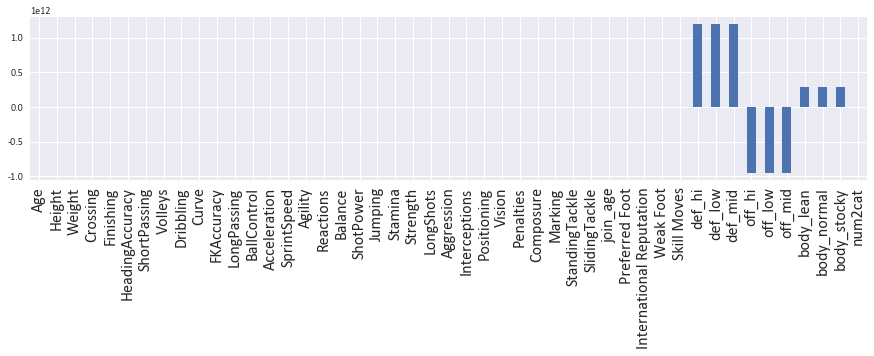

In [24]:
plt.figure(figsize=(15,3))
coef.Features.plot(kind='bar')
plt.show()

회귀계수를 통해 변수의 중요도를 확인하고자 했지만 결과가 이상하다.
- 가변수(dummy variable)화 과정에서 문제가 발생한 것 같다.
- 한개의 변수에 3개의 범주가 있을 경우 2개의 차원으로 나타낼 수 있다.
- 지금은 3개의 변수를 3개의 차원으로 나타냈으므로 하나를 줄여보자
    - ex) [마름, 보통, 건장]
    - before) [1, 0, 0], [0, 1, 0], [0, 0, 1]
    - after ) [1, 0], [0, 0], [0, 1]

In [25]:
X_train = X_train.drop(['def_mid', 'off_mid' ,'body_normal'], axis='columns')
X_train.head()

,Age,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,International Reputation,Weak Foot,Skill Moves,def_hi,def_low,off_hi,off_low,body_lean,body_stocky,num2cat
0,1.890241,1.897314,0.504524,0.596244,0.924429,0.824673,0.510466,1.609366,0.829636,1.042222,...,-1.0,0.5,-0.333333,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,0.557477,-0.136560,0.842159,-0.025075,-0.913213,0.217403,-1.464705,0.567594,-0.905227,-2.095652,...,-1.0,0.0,-1.000000,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0
2,-1.041841,-0.645029,-0.846018,0.285585,1.175017,-0.632776,0.151344,0.247049,0.395921,-0.762055,...,-1.0,0.5,-0.333333,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
3,-0.775288,1.388846,-0.677200,-0.025075,-1.581446,0.824673,-0.028217,-0.233769,-0.905227,0.257754,...,-1.0,0.0,-1.000000,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
4,-1.041841,-0.136560,0.673341,-0.025075,-1.080271,-0.389868,-0.926022,-1.676223,-0.182367,0.885329,...,-1.0,-0.5,-0.333333,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [26]:
model = linear_reg

X = X_train
y = df.Wage

model.fit(X,y)

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log1p'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           transformer=None)

In [27]:
model.regressor_.coef_

array([-0.00353278,  0.04672457, -0.01109618, -0.02377562, -0.06901542,
        0.11466431,  0.18608681,  0.02848532,  0.22939665,  0.09397173,
       -0.06220005, -0.1148508 ,  0.0675688 , -0.03246301,  0.04641165,
       -0.02948167,  0.06832619,  0.02195617,  0.05156216,  0.05772844,
        0.01853633,  0.03369245, -0.02283697,  0.03992809,  0.07752245,
       -0.02266179,  0.01005004,  0.0763686 , -0.03314387,  0.04556648,
        0.10056219,  0.07684171, -0.09277824, -0.0303424 ,  0.17000071,
       -0.01774579, -0.05092582,  0.01714813,  0.15100231,  0.00984177,
        0.11892088,  0.00225281, -0.08827239,  0.05960228])

In [28]:
coef = pd.DataFrame(model.regressor_.coef_)
coef.index   = X_train.columns
coef.columns = ['Features']
coef.head()

,Features
Age,-0.003533
Height,0.046725
Weight,-0.011096
Crossing,-0.023776
Finishing,-0.069015


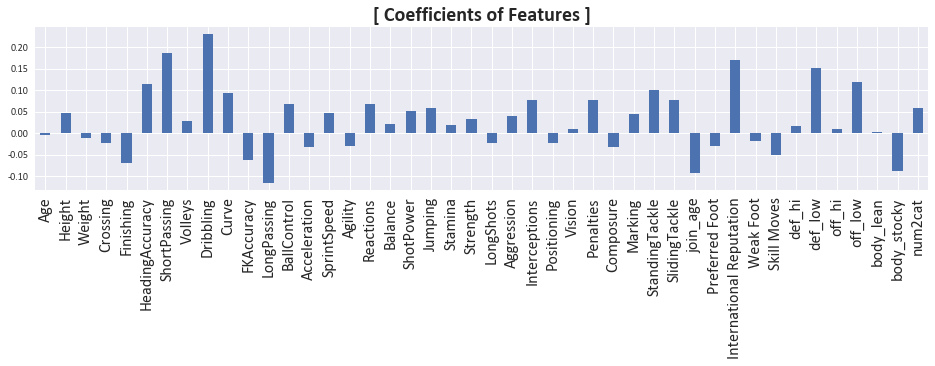

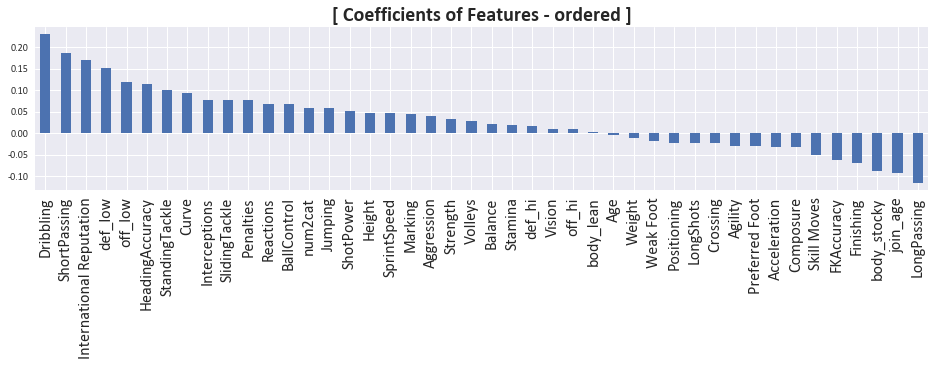

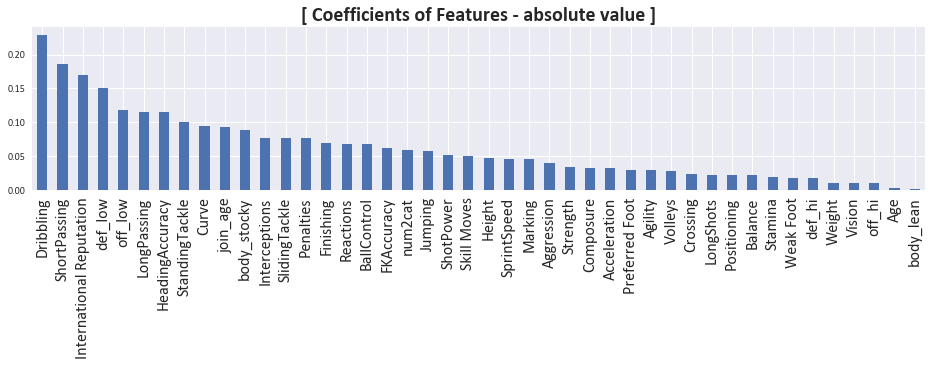

In [29]:
plt.figure(figsize=(16,3))
coef.Features.plot(kind='bar')
plt.title('[ Coefficients of Features ]')
plt.show()

plt.figure(figsize=(16,3))
coef.Features.sort_values(ascending=False).plot(kind='bar')
plt.title('[ Coefficients of Features - ordered ]' )

plt.show()

plt.figure(figsize=(16,3))
abs(coef.Features).sort_values(ascending=False).plot(kind='bar')
plt.title('[ Coefficients of Features - absolute value ]')
plt.show()

In [30]:
#linear regression 
model = linear_reg
X = X_train 
y = df.Wage

linear_reg_val_score = cross_validate(model, X, y, cv = repeated_kfold,
                                      scoring = ('neg_mean_squared_error','r2') ,
                                      return_train_score = True)

score = linear_reg_val_score
print('Train R2  : {}'.format(score['train_r2'].mean()))
print('Test  R2  : {}'.format(score['test_r2'].mean()))
print('Train MSE : {}'.format(-score['train_neg_mean_squared_error'].mean()))
print('Test  MSE : {}'.format(-score['test_neg_mean_squared_error'].mean()))

Train R2  : 0.6665813207521348
Test  R2  : 0.5948452027731947
Train MSE : 216.0923457700722
Test  MSE : 237.4593644332043


OLS : ordinary least squares

In [32]:
X = X_train
y = np.log1p(df.Wage)

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Wage   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              153.1
Date:                Fri, 15 May 2020   Prob (F-statistic):                   3.96e-313
Time:                        19:50:40   Log-Likelihood:                         -849.69
No. Observations:                 700   AIC:                                      1787.
Df Residuals:                     656   BIC:                                      1988.
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [18]:
#https://datascienceschool.net/view-notebook/36176e580d124612a376cf29872cd2f0/

In [33]:
# vif확인 (다중공선성)
# 1~무한대  --> 보통 5~10이상이면 다중공선성 있다고 판단
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif.sort_values(by='VIF',ascending=False)

,Features,VIF
40,off_low,11.391629
34,International Reputation,10.889442
38,def_low,9.010375
36,Skill Moves,5.541482
30,StandingTackle,4.967874
42,body_stocky,4.572908
12,BallControl,4.568846
31,SlidingTackle,4.397105
0,Age,4.297283
13,Acceleration,4.269957


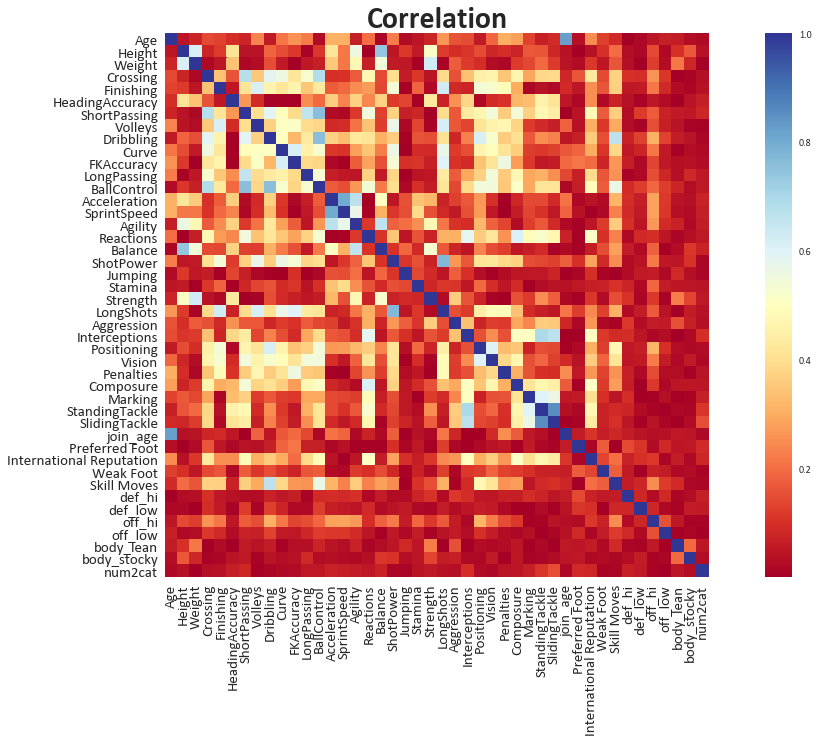

In [34]:
x = abs(X_train.corr())
# x = X_train.corr()

plt.figure(figsize=(20,10))
sns.heatmap(x, cmap='RdYlBu' ,annot=False, square=True)
plt.title('Correlation', fontsize=30, weight='bold')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=0)

plt.show()

In [21]:
#https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html

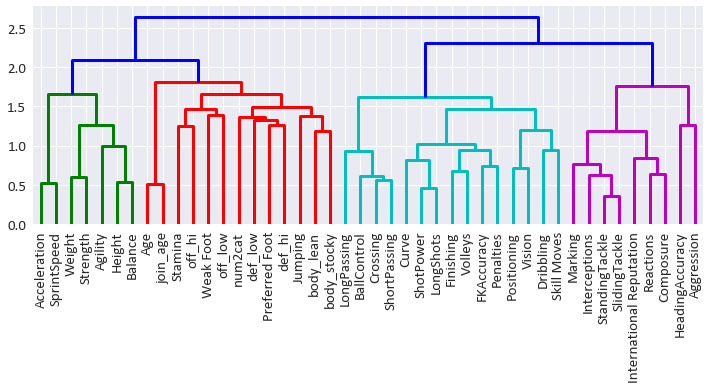

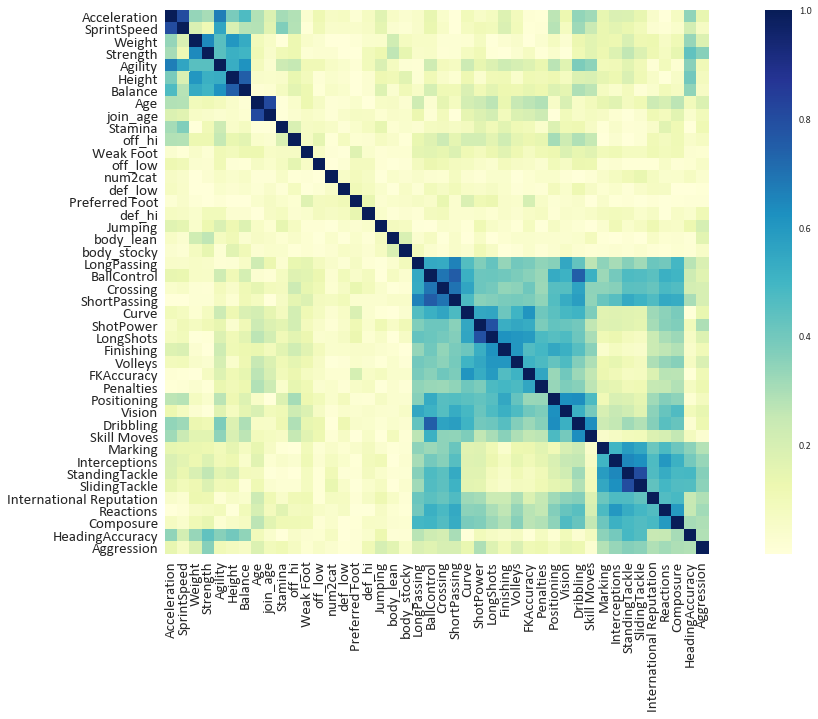

In [35]:
# Dendrogram
plt.figure(figsize=(12,4))
X=X_train
corr = spearmanr(X).correlation
corr = abs(corr)
corr_linkage = hierarchy.complete(corr)  # 다양한 연결법 사용 가능
dendro = hierarchy.dendrogram(corr_linkage, labels=X_train.columns,
                              leaf_rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=0)
plt.show()

# Heatmap
plt.figure(figsize=(20,10))
corr_cluster = pd.DataFrame(corr[dendro['leaves'], :][:, dendro['leaves']])
corr_cluster.index = dendro['ivl']
corr_cluster.columns = dendro['ivl']
sns.heatmap(corr_cluster,
            cmap='YlGnBu', square=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=0)
plt.show()

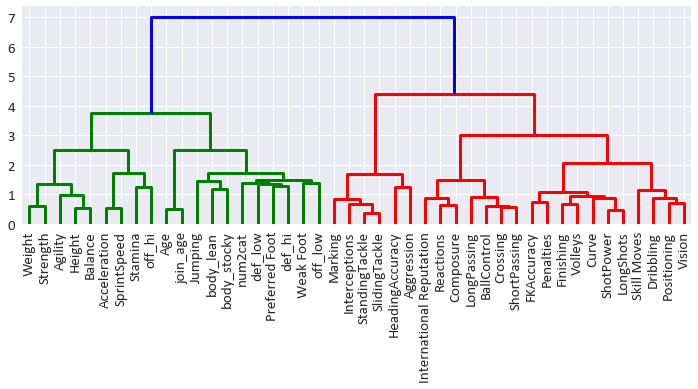

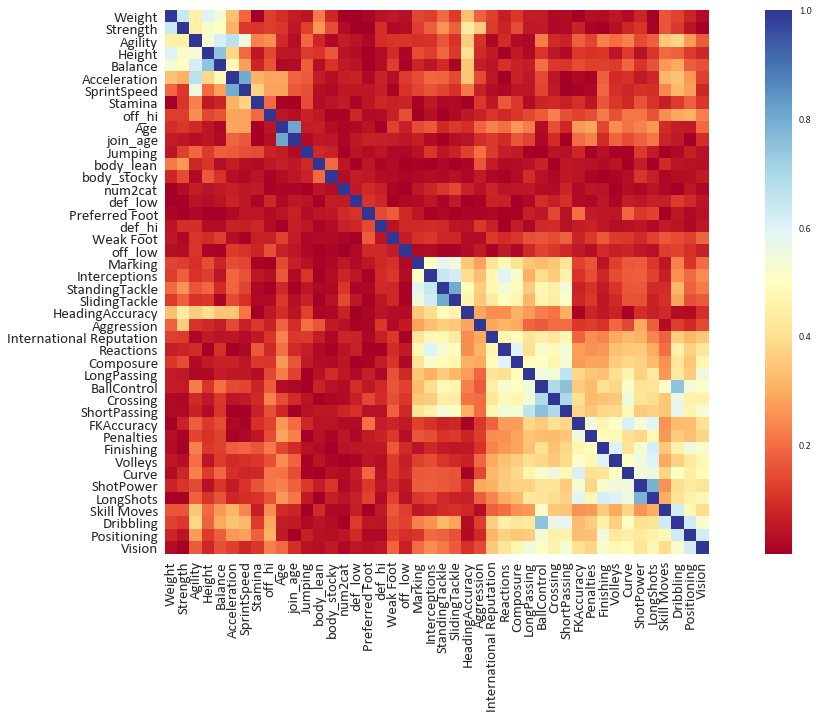

In [83]:
# Dendrogram
plt.figure(figsize=(12,4))
X=X_train
corr = spearmanr(X).correlation
corr = abs(corr)
corr_linkage = hierarchy.ward(corr)  # 다양한 연결법 사용 가능
dendro = hierarchy.dendrogram(corr_linkage, labels=X_train.columns,
                              leaf_rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=0)
plt.show()

# Heatmap
plt.figure(figsize=(20,10))
corr_cluster = pd.DataFrame(corr[dendro['leaves'], :][:, dendro['leaves']])
corr_cluster.index = dendro['ivl']
corr_cluster.columns = dendro['ivl']
sns.heatmap(corr_cluster,
            cmap='RdYlBu', square=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=0)
plt.show()

# Regularization
- lasso/Ridge/Elasitc net을 사용해서 모델의 일반화 성능을 높여보자
- 파라미터 종류가 많진 않지만 grid search를 이용해서 최적의 파라미터를 찾아보자

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid  #그냥 조합해서 dictionary만 리턴??
from sklearn.model_selection import RandomizedSearchCV #분포에서 n번 랜덤샘플링해서 조합

#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]

# Ridge

In [35]:
ridge = Ridge()
ridge = TransformedTargetRegressor(regressor=ridge,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function

In [36]:
model = ridge
X = X_train 
y = df.Wage

param_grid = {'regressor__alpha' : np.logspace(-2,3,20)} 
grid_search = GridSearchCV(model, param_grid, cv=repeated_kfold, 
                           return_train_score=True,
                           scoring = ('neg_mean_squared_error'))
grid_search.fit(X, y)      # fit 해야 결과가 나옴

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=1),
             error_score=nan,
             estimator=TransformedTargetRegressor(check_inverse=True,
                                                  func=<ufunc 'log1p'>,
                                                  inverse_func=<ufunc 'exp'>,
                                                  regressor=Ridge(alpha=1.0,
                                                                  copy_X=True,
                                                                  fit_intercept=True,
                                                                  max_iter=None,
                                                                  normalize=False,
                                                                  random_state=None,
                                                                  solver='auto',
                                                                  tol=0.001),
                            

In [37]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split17_train_score,split18_train_score,split19_train_score,split20_train_score,split21_train_score,split22_train_score,split23_train_score,split24_train_score,mean_train_score,std_train_score
0,0.003271,0.002248,0.000998,0.000400,0.01,{'regressor__alpha': 0.01},-169.515036,-149.465197,-214.694023,-434.781022,...,-183.435010,-287.091724,-221.231161,-181.002778,-240.273217,-212.351860,-200.620870,-240.090283,-216.087802,23.679644
1,0.003511,0.000982,0.001037,0.000869,0.0183298,{'regressor__alpha': 0.018329807108324356},-169.512579,-149.464548,-214.690746,-434.792865,...,-183.434530,-287.049051,-221.230205,-180.998937,-240.259702,-212.355636,-200.619317,-240.091964,-216.084021,23.674177
2,0.003750,0.000649,0.001277,0.000448,0.0335982,{'regressor__alpha': 0.03359818286283781},-169.508080,-149.463359,-214.684745,-434.814571,...,-183.433654,-286.970927,-221.228454,-180.991904,-240.234953,-212.362553,-200.616476,-240.095049,-216.077102,23.664173
3,0.003471,0.000753,0.001037,0.000526,0.0615848,{'regressor__alpha': 0.06158482110660264},-169.499843,-149.461182,-214.673766,-434.854348,...,-183.432063,-286.828046,-221.225251,-180.979035,-240.189672,-212.375221,-200.611290,-240.100708,-216.064453,23.645889
4,0.003353,0.000839,0.001074,0.000483,0.112884,{'regressor__alpha': 0.11288378916846889},-169.484784,-149.457193,-214.653711,-434.927229,...,-183.429192,-286.567213,-221.219405,-180.955521,-240.106944,-212.398405,-200.601853,-240.111101,-216.041384,23.612557


In [38]:
print('Best Score :',grid_search.best_score_)
print('Best Param :',grid_search.best_params_)

Best Score : -236.92915060136605
Best Param : {'regressor__alpha': 7.847599703514606}


In [39]:
gs = pd.DataFrame(grid_search.cv_results_)
gs[gs.mean_test_score==max(gs.mean_test_score)].mean_test_score

11   -236.929151
Name: mean_test_score, dtype: float64

In [40]:
gs.mean_test_score

0    -237.457656
1    -237.456237
2    -237.453640
3    -237.448904
4    -237.440294
5    -237.424759
6    -237.397091
7    -237.349020
8    -237.269360
9    -237.149315
10   -237.003877
11   -236.929151
12   -237.208245
13   -238.426552
14   -241.523131
15   -247.865611
16   -259.608369
17   -280.195397
18   -314.131946
19   -364.814176
Name: mean_test_score, dtype: float64

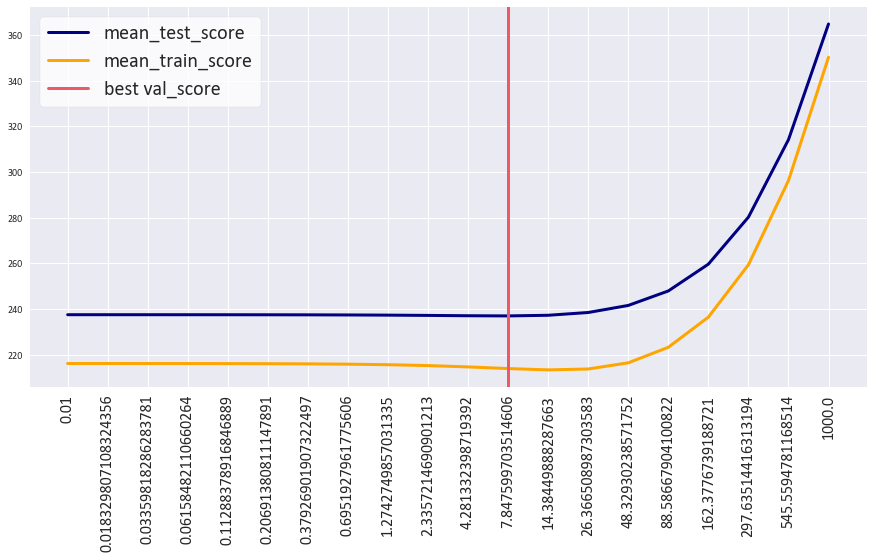

In [41]:
#.best_score_
#.best_params_
#.cv_results_
gs = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15,7))
plt.plot(-gs.mean_test_score, data = gs, color='navy')
plt.plot(-gs.mean_train_score, data = gs, color='orange')
plt.legend(fontsize=20, frameon=True, facecolor='white')

best = gs[gs.mean_test_score==max(gs.mean_test_score)].mean_test_score.index[0]
plt.axvline(x = int(best), color='#ED5A66', alpha=1, label='best val_score')

plt.xticks(np.arange(len(param_grid['regressor__alpha'])),  labels = param_grid['regressor__alpha'],
           rotation=90)

plt.legend(fontsize=20)
plt.show()
#plt.scatter(x='param_regressor__alpha', y='mean_test_score', data = a, s=120, alpha=alpha, color='navy', marker='X')

In [42]:
model = ridge
X = X_train 
y = df.Wage

param_grid = {'regressor__alpha' : np.arange(5,10,0.2)}  # target transform reg에서 regressor__를 붙여준다?
grid_search = GridSearchCV(model, param_grid, cv=repeated_kfold, 
                           return_train_score=True,
                           scoring = ('neg_mean_squared_error'))
grid_search.fit(X, y)      # fit 해야 결과가 나옴

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=1),
             error_score=nan,
             estimator=TransformedTargetRegressor(check_inverse=True,
                                                  func=<ufunc 'log1p'>,
                                                  inverse_func=<ufunc 'exp'>,
                                                  regressor=Ridge(alpha=1.0,
                                                                  copy_X=True,
                                                                  fit_intercept=True,
                                                                  max_iter=None,
                                                                  normalize=False,
                                                                  random_state=None,
                                                                  solver='auto',
                                                                  tol=0.001),
                            

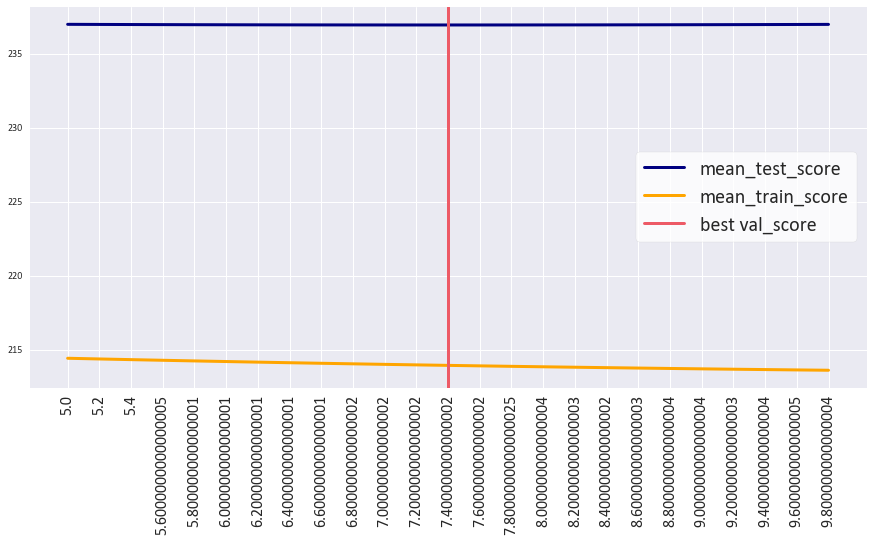

In [43]:
#.best_score_
#.best_params_
#.cv_results_
a = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15,7))
plt.plot(-a.mean_test_score, data = a, color='navy')
plt.plot(-a.mean_train_score, data = a, color='orange')
plt.legend(fontsize=20, frameon=True, facecolor='white')

best = a[a.mean_test_score==max(a.mean_test_score)].mean_test_score.index[0]
plt.axvline(x = int(best), color='#ED5A66', alpha=1, label='best val_score')

plt.xticks(np.arange(len(param_grid['regressor__alpha'])),  labels = param_grid['regressor__alpha'],
           rotation=90)

plt.legend(fontsize=20)
plt.show()
#plt.scatter(x='param_regressor__alpha', y='mean_test_score', data = a, s=120, alpha=alpha, color='navy', marker='X')

In [44]:
ridge = Ridge(alpha=7.4)  #alpha의 default는 1
ridge = TransformedTargetRegressor(regressor=ridge,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function

- reeated kfold를 동일하게 실행할 경우 정규화가 없을 때보다 test(val) score가 소폭 개선되었다.

In [45]:
#Ridge
model = ridge
X = X_train 
y = df.Wage

ridge_val_score = cross_validate(model, X, y, cv = repeated_kfold,
                                      scoring = ('neg_mean_squared_error','r2') ,
                                      return_train_score = True)

score = ridge_val_score
print('Train R2  : {}'.format(score['train_r2'].mean()))
print('Test  R2  : {}'.format(score['test_r2'].mean()))
print('Train MSE : {}'.format(-score['train_neg_mean_squared_error'].mean()))
print('Test  MSE : {}'.format(-score['test_neg_mean_squared_error'].mean()))

Train R2  : 0.6695940187810693
Test  R2  : 0.5975191736903023
Train MSE : 213.9336553212966
Test  MSE : 236.9274328884554


In [46]:
model.regressor.fit(X,y).coef_[0]

1.9159504257580668

In [47]:
model.regressor.fit(X,y).coef_

array([ 1.91595043e+00,  1.84818742e+00,  5.59694577e-02,  1.19210145e+00,
        5.72273479e-01,  2.93461916e+00,  2.78993085e+00, -1.02243592e+00,
       -4.77741701e-02,  3.82576063e-01, -5.21125357e-01, -1.70790984e+00,
        2.51394234e+00,  8.43003418e-01,  2.07361597e+00,  7.88929946e-01,
        2.63153258e+00,  1.74607618e+00, -9.00423680e-01, -3.93534226e-01,
        1.22709384e+00,  8.14766029e-01,  1.13238018e+00,  4.08599913e-01,
        2.28852481e+00, -4.42547559e-01, -2.27976408e-02,  5.51216160e-01,
       -3.85491132e-01,  1.48137221e+00,  2.02179580e+00,  1.00436597e+00,
       -4.60814545e+00, -9.25881282e-01,  1.84852821e+01, -6.59692297e-01,
        3.88514038e+00,  1.37990512e+00,  8.09208389e+00,  1.42254125e-01,
        1.80790062e+00,  5.04900113e-01,  7.10414263e-03,  1.67342177e+00])

In [51]:
coef

,Age,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,International Reputation,Weak Foot,Skill Moves,def_hi,def_low,off_hi,off_low,body_lean,body_stocky,num2cat
0,1.902233,1.954299,-0.077484,1.153222,0.518675,3.020108,2.833607,-1.126653,-0.236305,0.355668,...,21.571021,-0.838008,4.834898,1.345675,8.715767,0.102833,2.075993,0.397086,-0.021990,1.662500
1,1.902472,1.953783,-0.076780,1.153414,0.518968,3.019681,2.833373,-1.126108,-0.235306,0.355817,...,21.554773,-0.837055,4.829644,1.345887,8.712835,0.103047,2.074610,0.397660,-0.021843,1.662570
2,1.902785,1.953100,-0.075848,1.153669,0.519356,3.019116,2.833063,-1.125387,-0.233984,0.356015,...,21.533273,-0.835794,4.822696,1.346167,8.708949,0.103330,2.072780,0.398420,-0.021648,1.662663
3,1.903194,1.952195,-0.074615,1.154006,0.519868,3.018369,2.832654,-1.124434,-0.232237,0.356275,...,21.504841,-0.834126,4.813515,1.346536,8.703801,0.103704,2.070359,0.399425,-0.021391,1.662786
4,1.903728,1.950998,-0.072986,1.154451,0.520545,3.017381,2.832113,-1.123175,-0.229928,0.356619,...,21.467273,-0.831924,4.801397,1.347023,8.696982,0.104198,2.067159,0.400752,-0.021050,1.662948
5,1.904420,1.949415,-0.070836,1.155041,0.521437,3.016074,2.831399,-1.121512,-0.226881,0.357072,...,21.417685,-0.829018,4.785424,1.347663,8.687953,0.104850,2.062933,0.402504,-0.020600,1.663161
6,1.905308,1.947322,-0.068003,1.155819,0.522612,3.014349,2.830460,-1.119320,-0.222867,0.357669,...,21.352325,-0.825190,4.764409,1.348503,8.676002,0.105709,2.057357,0.404812,-0.020006,1.663439
7,1.906438,1.944559,-0.064275,1.156847,0.524155,3.012075,2.829227,-1.116435,-0.217588,0.358452,...,21.266336,-0.820157,4.736827,1.349600,8.660190,0.106837,2.050015,0.407847,-0.019222,1.663803
8,1.907851,1.940914,-0.059383,1.158201,0.526176,3.009079,2.827612,-1.112648,-0.210664,0.359476,...,21.153480,-0.813559,4.700743,1.351026,8.639287,0.108314,2.040366,0.411828,-0.018191,1.664275
9,1.909579,1.936114,-0.052983,1.159982,0.528812,3.005145,2.825504,-1.107692,-0.201613,0.360812,...,21.005837,-0.804938,4.653733,1.352870,8.611678,0.110242,2.027721,0.417031,-0.016836,1.664884


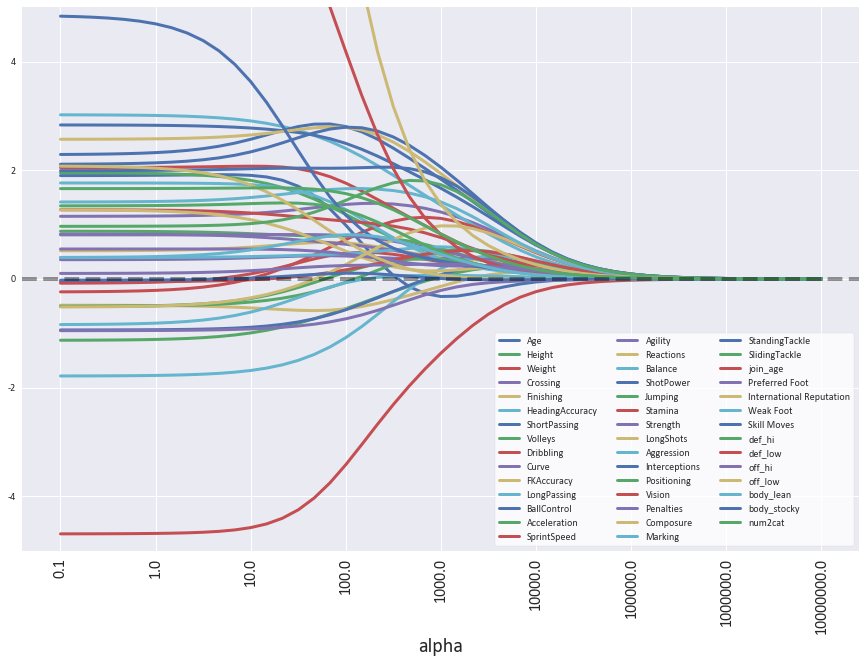

In [48]:
#Ridge 변수조절효과 확인
#alpha = range(0,200000,1000)
alpha = np.logspace(-1,7,49)

plt.figure(figsize=(15,10))
coef=[]

for i in alpha:
    ridge = Ridge(alpha=i)
    ridge = TransformedTargetRegressor(regressor=ridge,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function
    model = ridge
    X = X_train 
    y = df.Wage
    
    coef.append(model.regressor.fit(X,y).coef_)

coef = pd.DataFrame(coef)
coef.columns = X_train.columns
plt.plot(coef)
plt.legend(coef, ncol = 3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=4, alpha=0.4)
plt.ylim(-5,5)
plt.xticks(np.arange(len(alpha), step=6),  labels = np.logspace(-1,7,9) ,
           rotation=90)
plt.xlabel('alpha')
           
plt.show()

# Lasso

In [49]:
lasso = Lasso(alpha=0.01)
lasso = TransformedTargetRegressor(regressor=lasso,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function

In [50]:
model = lasso
X = X_train 
y = df.Wage

param_grid = {'regressor__alpha' : np.logspace(-5,-1,20)} 
grid_search = GridSearchCV(model, param_grid, cv=repeated_kfold, 
                           return_train_score=True,
                           scoring = ('neg_mean_squared_error'))
grid_search.fit(X, y)      # fit 해야 결과가 나옴

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=1),
             error_score=nan,
             estimator=TransformedTargetRegressor(check_inverse=True,
                                                  func=<ufunc 'log1p'>,
                                                  inverse_func=<ufunc 'exp'>,
                                                  regressor=Lasso(alpha=0.01,
                                                                  copy_X=True,
                                                                  fit_intercept=True,
                                                                  max_iter=1000,
                                                                  normalize=False,
                                                                  positive=False,
                                                                  precompute=False,
                                                                  random_state=None,
                    

In [51]:
print('Best Score :',grid_search.best_score_)
print('Best Param :',grid_search.best_params_)

Best Score : -237.06023537682466
Best Param : {'regressor__alpha': 0.0012742749857031334}


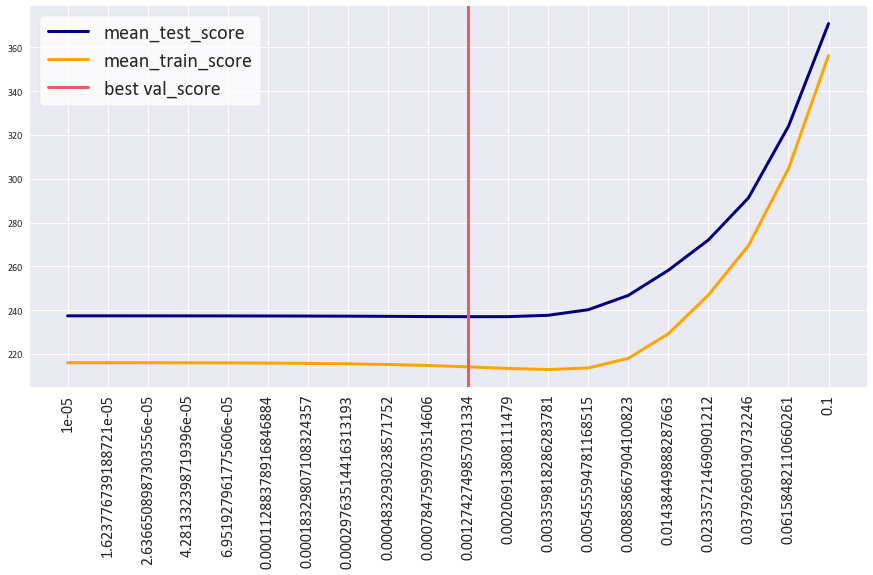

In [52]:
gs = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15,7))
plt.plot(-gs.mean_test_score, data = gs, color='navy')
plt.plot(-gs.mean_train_score, data = gs, color='orange')
plt.legend(fontsize=20, frameon=True, facecolor='white')

best = gs[gs.mean_test_score==max(gs.mean_test_score)].mean_test_score.index[0]
plt.axvline(x = int(best), color='#ED5A66', alpha=1, label='best val_score')

plt.xticks(np.arange(len(param_grid['regressor__alpha'])),  labels = param_grid['regressor__alpha'],
           rotation=90)

plt.legend(fontsize=20)
plt.show()
#plt.scatter(x='param_regressor__alpha', y='mean_test_score', data = a, s=120, alpha=alpha, color='navy', marker='X')

In [54]:
lasso = Lasso(alpha=0.0013)
lasso = TransformedTargetRegressor(regressor=lasso,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function

In [55]:
#Lasso
model = lasso
X = X_train 
y = df.Wage

ridge_val_score = cross_validate(model, X, y, cv = repeated_kfold,
                                      scoring = ('neg_mean_squared_error','r2') ,
                                      return_train_score = True)

score = ridge_val_score
print('Train R2  : {}'.format(score['train_r2'].mean()))
print('Test  R2  : {}'.format(score['test_r2'].mean()))
print('Train MSE : {}'.format(-score['train_neg_mean_squared_error'].mean()))
print('Test  MSE : {}'.format(-score['test_neg_mean_squared_error'].mean()))

Train R2  : 0.6693321379778623
Test  R2  : 0.5970822404483836
Train MSE : 214.1258673042995
Test  MSE : 237.05757163534597


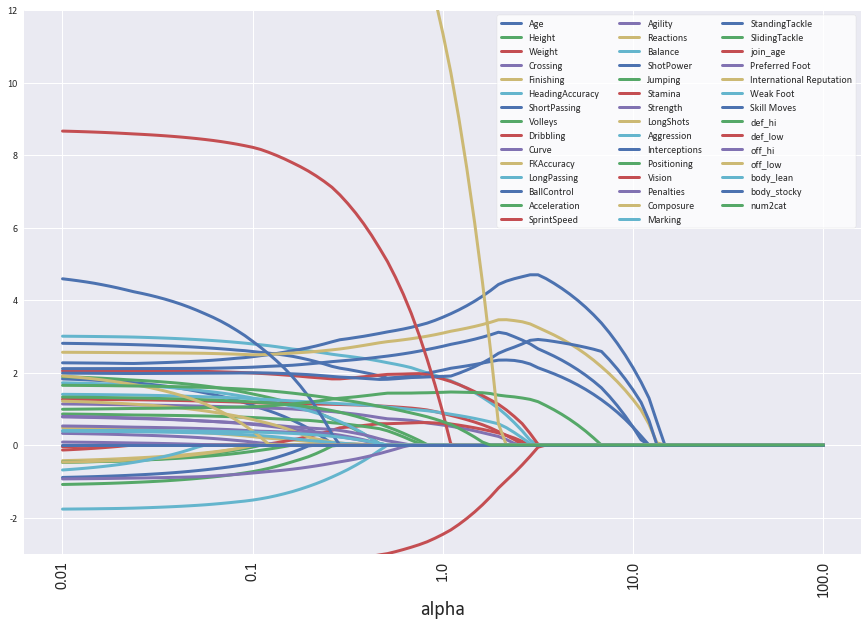

In [56]:
#Lasso 변수조절효과 확인

alpha = np.logspace(-2,2,97)
plt.figure(figsize=(15,10))
coef=[]

for i in alpha:
    lasso = Lasso(alpha=i)
    lasso = TransformedTargetRegressor(regressor=lasso,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function
    model = lasso
    X = X_train 
    y = df.Wage
    
    coef.append(model.regressor.fit(X,y).coef_)

coef = pd.DataFrame(coef)
coef.columns = X_train.columns
plt.plot(coef)
plt.legend(coef, ncol = 3)
plt.ylim(-3,12)
plt.xticks(np.arange(len(alpha), step=24),  labels = np.logspace(-2,2,5) ,
           rotation=90)
plt.xlabel('alpha')
plt.show()

# Elastic Net

In [57]:
elastic = ElasticNet(alpha=0.01, l1_ratio=1e-05)
elastic = TransformedTargetRegressor(regressor=elastic,
                                            func=np.log1p,       # y에 취할 function 
                                            inverse_func=np.exp) # prediction에 취할 function

Elastic Net의 parameter (scikit learn)
- alpha : lambda(페널티 정도)
- l1 ratio : l1 과 l2의 비율 (default = 0.5)

In [93]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [99]:
# elastic net grid search
X = X_train 
y = df.Wage

model = elastic
param_grid = {'regressor__alpha':np.logspace(-2,0,10),
              'regressor__l1_ratio':np.arange(0,1,0.2)}  # target transform reg에서 regressor__를 붙여준다?
grid_search = GridSearchCV(model, param_grid, cv=repeated_kfold, 
                           return_train_score=True,
                           scoring = ('neg_mean_squared_error'))
grid_search.fit(X, y)  # fit 해야 결과가 나옴

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=1),
             error_score=nan,
             estimator=TransformedTargetRegressor(check_inverse=True,
                                                  func=<ufunc 'log1p'>,
                                                  inverse_func=<ufunc 'exp'>,
                                                  regressor=ElasticNet(alpha=0.01,
                                                                       copy_X=True,
                                                                       fit_intercept=True,
                                                                       l1_ratio=1e-05,
                                                                       max_iter=1000,
                                                                       normalize=False,
                                                                       positive=False,
                                                                       p

In [101]:
print('Best Score :',grid_search.best_score_)
print('Best Param :',grid_search.best_params_)

Best Score : -236.9510101265927
Best Param : {'regressor__alpha': 0.01, 'regressor__l1_ratio': 0.0}


In [102]:
gs = pd.DataFrame(grid_search.cv_results_)
gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__alpha,param_regressor__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split17_train_score,split18_train_score,split19_train_score,split20_train_score,split21_train_score,split22_train_score,split23_train_score,split24_train_score,mean_train_score,std_train_score
0,0.025747,0.005510,0.001432,0.000569,0.01,0,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",-168.105586,-149.057305,-212.948460,...,-183.396387,-265.076830,-220.748739,-178.933919,-232.974551,-214.633013,-200.023051,-241.343724,-214.277722,21.101300
1,0.004794,0.001051,0.001400,0.000632,0.01,0.2,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",-167.000171,-149.412001,-213.614657,...,-183.681319,-248.741338,-220.845470,-175.616057,-226.215647,-216.183671,-201.248536,-243.504422,-213.053522,19.649365
2,0.004886,0.000955,0.001312,0.000547,0.01,0.4,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",-165.599739,-150.066206,-215.029091,...,-184.982982,-239.552226,-221.727346,-173.839279,-222.539425,-218.374383,-202.647388,-246.066838,-213.143040,19.133730
3,0.004311,0.001002,0.001115,0.000430,0.01,0.6,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",-164.070533,-150.946015,-218.187666,...,-187.136577,-234.216417,-223.543988,-173.957571,-220.907965,-220.944194,-203.732823,-250.258731,-214.444564,19.027286
4,0.003799,0.000489,0.000919,0.000482,0.01,0.8,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",-162.745198,-152.714715,-222.129327,...,-191.801798,-231.385709,-226.192608,-175.222640,-220.779576,-223.908629,-206.618021,-255.436216,-216.882859,19.097020


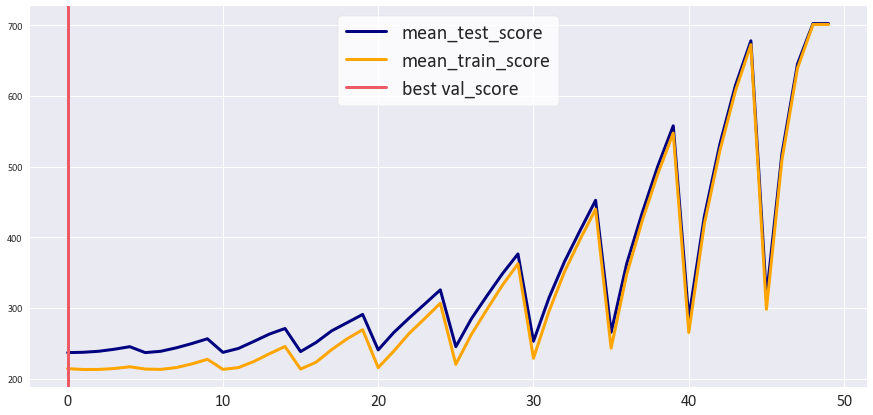

In [103]:
gs = pd.DataFrame(grid_search.cv_results_)#.sort_values(by='mean_test_score',ascending=False).reset_index()
plt.figure(figsize=(15,7))
plt.plot(-gs.mean_test_score, data = gs, color='navy')
plt.plot(-gs.mean_train_score, data = gs, color='orange')
plt.legend(fontsize=20, frameon=True, facecolor='white')

best = gs[gs.mean_test_score==max(gs.mean_test_score)].mean_test_score.index[0]
plt.axvline(x = int(best), color='#ED5A66', alpha=1, label='best val_score')

#plt.xticks(np.arange(len(param_grid['regressor__alpha'])),  labels = param_grid['regressor__alpha'],
#           rotation=90)

plt.legend(fontsize=20)
plt.show()
#plt.scatter(x='param_regressor__alpha', y='mean_test_score', data = a, s=120, alpha=alpha, color='navy', marker='X')

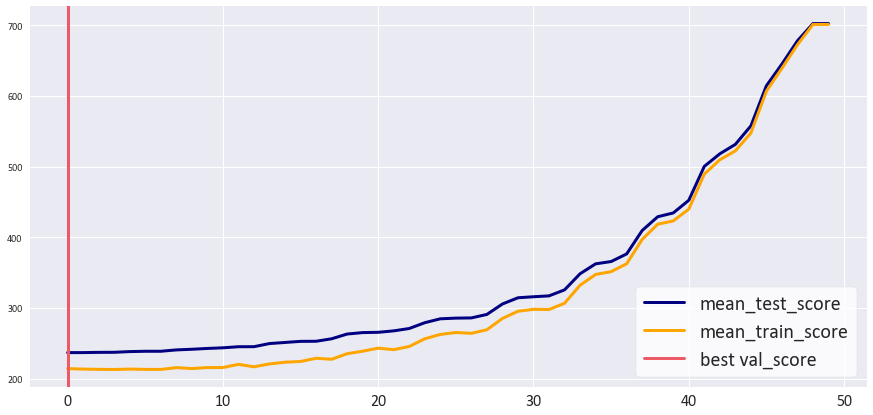

In [104]:
gs = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score',ascending=False).reset_index()
plt.figure(figsize=(15,7))
plt.plot(-gs.mean_test_score, data = gs, color='navy')
plt.plot(-gs.mean_train_score, data = gs, color='orange')
plt.legend(fontsize=20, frameon=True, facecolor='white')

best = gs[gs.mean_test_score==max(gs.mean_test_score)].mean_test_score.index[0]
plt.axvline(x = int(best), color='#ED5A66', alpha=1, label='best val_score')

#plt.xticks(np.arange(len(param_grid['regressor__alpha'])),  labels = param_grid['regressor__alpha'],
#           rotation=90)

plt.legend(fontsize=20)
plt.show()
#plt.scatter(x='param_regressor__alpha', y='mean_test_score', data = a, s=120, alpha=alpha, color='navy', marker='X')

- Elastic Net의 효과는 별로 없는 듯 합니다.

In [105]:
print(model.__dir__())

['regressor', 'transformer', 'func', 'inverse_func', 'check_inverse', '__module__', '__doc__', '__init__', '_fit_transformer', 'fit', 'predict', '_more_tags', '_estimator_type', 'score', '__dict__', '__weakref__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__', '_get_param_names', 'get_params', 'set_params', '__getstate__', '__setstate__', '_get_tags']
